# Extracting Spectra using get_spectra

This notebook demonstrates how to grab 1D aperture summed HETDEX spectra for an input of ID, RA and DEC using the `Extract` Class API from `hetdex_api`. This can be done interactively using `get_spectra` from hte `hetdex_tools.get_spec` module.

Examples of what you might like to do with the spectra afterwards is shown later. The output is stored in an astropy table of spectra. For every HETDEX observation where spectra is found, a spectra is given. It is up to the user to combine the spectra afterwards.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.table import Table, join, vstack

from hetdex_tools.get_spec import get_spectra

In [2]:
%matplotlib inline

## Getting all spectra at a specified RA/DEC. This will search through all shots in HDR3

If a shotid is not specified the program will search for any shot within the data release that overlaps within an 11 arcmin radius of the input coordinates. Because of the non-contiguous VIRUS footprint, there is no guarantee the aperture defined by the input ra/dec/rad will contain enough fibers to do a measurement. The aperture radius is 3.5" by default or can be specified with the --rad argument. 

Open a catalog of IDs, RAs, DECs. We'll use the public AGN catalog as an example.

In [3]:
url_to_agn1 = "http://web.corral.tacc.utexas.edu/hetdex/HETDEX/catalogs/agn_catalog_v1.0/hetdex_agn.fits"

In [4]:
# we'll just do the first 20 as an example. 
input_cat = Table.read(url_to_agn1)

In [5]:
# select a small RA range of the catalog as an example

In [6]:
sel_slice = (input_cat['ra']>12) * (input_cat['ra']<14) * (input_cat['field']=='dex-fall')

In [7]:
input_cat = input_cat[sel_slice]

`get_spectra()` requires an astropy coordinates object list as an input.

In [8]:
input_coords = SkyCoord(ra=input_cat['ra'], dec=input_cat['dec'])

Note that get_spectra will automatically use upto 32 processors to efficiently extract spectra from the fiber database. If you do not require parallel processing then set multiprocessing=False in the function call. If you would like to see logging info, set loglevel='INFO'. Set loglevel='WARNING' or loglevel='ERROR' for unneccessary logging output.

In [9]:
sources = get_spectra(input_coords, ID=input_cat['agnid'], loglevel='INFO', survey='hdr4', apply_mask=True)

[INFO - 2024-04-11 15:53:44,425] Finding shots of interest
[INFO - 2024-04-11 15:53:50,473] Number of shots of interest: 56
[INFO - 2024-04-11 15:53:50,475] Extracting 184 sources
[INFO - 2024-04-11 15:53:50,787] Working on shot: 20171017007
[INFO - 2024-04-11 15:53:50,806] Working on shot: 20171024008
[INFO - 2024-04-11 15:53:50,819] Working on shot: 20181106008
[INFO - 2024-04-11 15:53:50,839] Working on shot: 20171120007
[INFO - 2024-04-11 15:53:50,841] Working on shot: 20171025013
[INFO - 2024-04-11 15:53:50,842] Working on shot: 20171213010
[INFO - 2024-04-11 15:53:50,843] Working on shot: 20171115010
[INFO - 2024-04-11 15:53:50,843] Working on shot: 20171019010
[INFO - 2024-04-11 15:53:50,843] Working on shot: 20181130012
[INFO - 2024-04-11 15:53:50,844] Working on shot: 20181010025
[INFO - 2024-04-11 15:53:50,845] Working on shot: 20180820018
[INFO - 2024-04-11 15:53:50,845] Working on shot: 20181104012
[INFO - 2024-04-11 15:53:50,847] Working on shot: 20180810009
[INFO - 2024-0

In [10]:
sources

ID,shotid,wavelength,spec,spec_err,apcor,flag,gal_flag,amp_flag,meteor_flag
,,Angstrom,1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),,,,,
int64,int64,float64[1036],float64[1036],float64[1036],float64[1036],int64,int64,int64,int64
4506,20171023013,3470.0 .. 5540.0,13.070671318213519 .. 4.626955944016633,7.696168523996925 .. 1.773998036016293,0.936494814265974 .. 0.9432680341287364,1,1,1,1
161,20171024008,3470.0 .. 5540.0,-2.2362675197463826 .. 0.5342602209052645,12.766469896041446 .. 2.8723909687805453,0.4681495581973753 .. 0.48108301277560095,1,1,1,1
5156,20171025013,3470.0 .. 5540.0,2.9709237604638483 .. 1.4335568077165386,4.04934908080845 .. 1.5436523620664215,0.9389218990553002 .. 0.9427326574977338,1,1,1,1
2339,20171019010,3470.0 .. 5540.0,3.096066603847864 .. 1.6389890440906856,9.264010238795601 .. 3.045080587719036,0.8847841188994388 .. 0.8866537250997969,1,1,1,1
4294,20171213010,3470.0 .. 5540.0,3.2617290879947993 .. 1.0018050569290384,6.327588169006198 .. 1.3831680777672575,0.9253019904255423 .. 0.9358813335079809,1,1,1,1
1736,20171017007,3470.0 .. 5540.0,0.7542228470487529 .. 0.38129510937580424,4.632006152444206 .. 1.4135885033652293,0.9272322663657255 .. 0.9329175521284745,1,1,1,1
5300,20171124010,3470.0 .. 5540.0,1.398736070833743 .. 1.5750259788517258,3.346292424569998 .. 1.5042776722457456,0.9391887062625848 .. 0.9470066442127784,1,1,1,1
2686,20180113006,3470.0 .. 5540.0,6.4978516592276 .. 2.2994591182986692,7.36751844172225 .. 1.657070069442731,0.9136096100086114 .. 0.9276502674851419,1,1,1,1


##  get_spectra() options

There are a few options to consider when running get_spectra():

In [11]:
help(get_spectra)

Help on function get_spectra in module hetdex_tools.get_spec:

get_spectra(coords, ID=None, rad=3.5, multiprocess=True, shotid=None, survey='hdr4', tpmin=0.08, keep_bad_shots=False, ffsky=False, ffsky_rescor=False, fiberweights=False, return_fiber_info=False, loglevel='INFO', apply_update=True, fiber_flux_offset=None, apply_mask=False)
    Function to retrieve PSF-weighted, ADR and aperture corrected
    spectral extractions of HETDEX fibers. It will search all shots
    within a specific HETDEX Data Release and return a table of
    spectra for each extraction per shot in which more than 7 fibers
    are found in order to generate an extracted spectrum.
    
    Parameters
    ----------
    coords
        list astropy coordinates
    ID
        list of ID names (must be same length as coords). Will
        generate a running index if no ID is given
    rad
        radius of circular aperture to be extracted in arcsec.
        Default is 3.5
    multiprocess: bool
        boolean flag

### Reading in the output - astropy FITS files

Join your input and output table so you can match up any properties you like

In [12]:
output_table = join(input_cat, sources, keys_left=['agnid'], keys_right=['ID'])

In [13]:
output_table

agnid,ra,dec,z,z_er,zflag,field,nshots,detectid_best,ra_best,dec_best,roff,nmem,alpha,alpha_er,fpl0,fpl0_er,slope,slope_er,intercept,intercept_er,L1350,L1350_er,L1450,L1450_er,L3000,L3000_er,L5100,L5100_er,fwhm_LyA,fwhm_LyA_er,ew_LyA,ew_LyA_er,flux_LyA,flux_LyA_er,cont_LyA,cont_LyA_er,snr_LyA,snr_LyA_er,chi2_LyA,chi2_LyA_er,fwhm_NV,fwhm_NV_er,ew_NV,ew_NV_er,flux_NV,flux_NV_er,cont_NV,cont_NV_er,fwhm_SiO,fwhm_SiO_er,ew_SiO,ew_SiO_er,flux_SiO,flux_SiO_er,cont_SiO,cont_SiO_er,snr_SiO,snr_SiO_er,chi2_SiO,chi2_SiO_er,fwhm_CIV,fwhm_CIV_er,ew_CIV,ew_CIV_er,flux_CIV,flux_CIV_er,cont_CIV,cont_CIV_er,snr_CIV,snr_CIV_er,chi2_CIV,chi2_CIV_er,fwhm_HeII,fwhm_HeII_er,ew_HeII,ew_HeII_er,flux_HeII,flux_HeII_er,cont_HeII,cont_HeII_er,snr_HeII,snr_HeII_er,chi2_HeII,chi2_HeII_er,fwhm_CIII,fwhm_CIII_er,ew_CIII,ew_CIII_er,flux_CIII,flux_CIII_er,cont_CIII,cont_CIII_er,snr_CIII,snr_CIII_er,chi2_CIII,chi2_CIII_er,fwhm_MgII,fwhm_MgII_er,ew_MgII,ew_MgII_er,flux_MgII,flux_MgII_er,cont_MgII,cont_MgII_er,snr_MgII,snr_MgII_er,chi2_MgII,chi2_MgII_er,fwhm_OII,fwhm_OII_er,ew_OII,ew_OII_er,flux_OII,flux_OII_er,cont_OII,cont_OII_er,snr_OII,snr_OII_er,chi2_OII,chi2_OII_er,fwhm_OVI,fwhm_OVI_er,ew_OVI,ew_OVI_er,flux_OVI,flux_OVI_er,cont_OVI,cont_OVI_er,snr_OVI,snr_OVI_er,chi2_OVI,chi2_OVI_er,fiberid,r_aper,r_aper_er,r_radius,r_depth,r_cat,g_aper,g_aper_er,g_radius,g_depth,g_cat,u_aper,u_aper_er,u_radius,u_depth,u_cat,rsep_dr14q,id_dr14q,z_dr14q,rsep_dr16,plate_dr16,fiber_dr16,mjd_dr16,z_dr16,sflag,apcor_1,ID,shotid,wavelength,spec,spec_err,apcor_2,flag,gal_flag,amp_flag,meteor_flag
,deg,deg,,,,,,,deg,deg,arcsec,,,,,,,,,,1e+44 erg / s,1e+44 erg / s,1e+44 erg / s,1e+44 erg / s,1e+44 erg / s,1e+44 erg / s,1e+44 erg / s,1e+44 erg / s,km / s,km / s,Angstrom,Angstrom,1e-17 erg / (s cm2),1e-17 erg / (s cm2),1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),,,,,km / s,km / s,Angstrom,Angstrom,1e-17 erg / (s cm2),1e-17 erg / (s cm2),1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),km / s,km / s,Angstrom,Angstrom,1e-17 erg / (s cm2),1e-17 erg / (s cm2),1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),,,,,km / s,km / s,Angstrom,Angstrom,1e-17 erg / (s cm2),1e-17 erg / (s cm2),1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),,,,,km / s,km / s,Angstrom,Angstrom,1e-17 erg / (s cm2),1e-17 erg / (s cm2),1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),,,,,km / s,km / s,Angstrom,Angstrom,1e-17 erg / (s cm2),1e-17 erg / (s cm2),1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),,,,,km / s,km / s,Angstrom,Angstrom,1e-17 erg / (s cm2),1e-17 erg / (s cm2),1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),,,,,km / s,km / s,Angstrom,Angstrom,1e-17 erg / (s cm2),1e-17 erg / (s cm2),1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),,,,,km / s,km / s,Angstrom,Angstrom,1e-17 erg / (s cm2),1e-17 erg / (s cm2),1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),,,,,,mag,mag,arcsec,arcsec,,mag,mag,arcsec,arcsec,,mag,mag,arcsec,arcsec,,arcsec,,,arcsec,,,,,,,,,Angstrom,1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),,,,,
int64,float32,float32,float32,float32,int64,bytes10,int64,int64,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,f

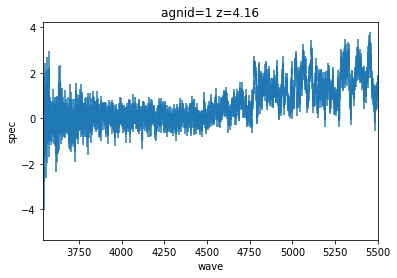

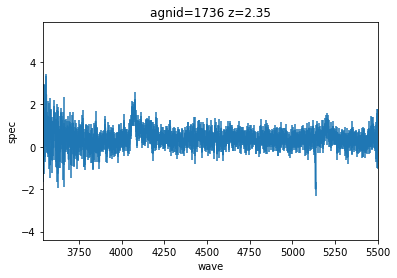

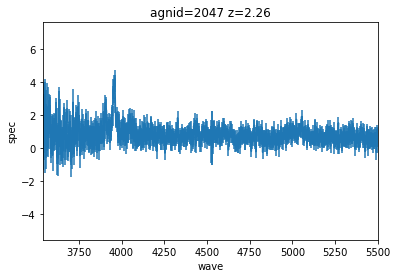

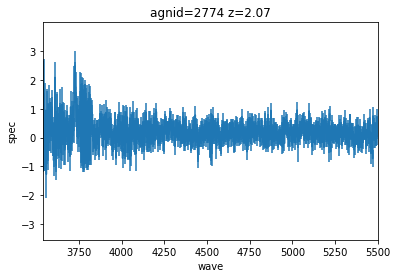

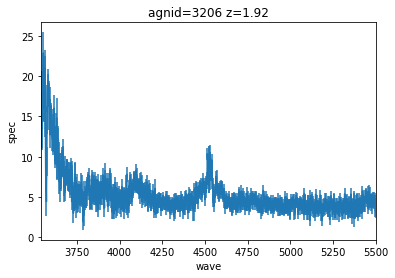

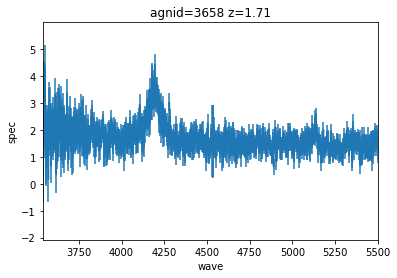

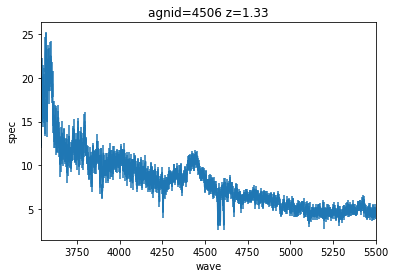

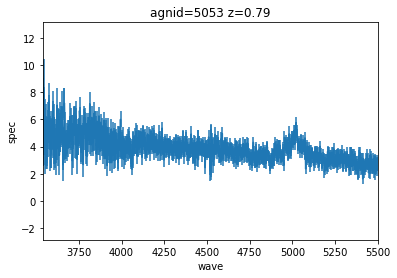

In [14]:

for row in output_table[np.arange(0,len(output_table), 10)]:
    plt.figure()
    wave = row['wavelength']
    spec = row['spec']
    spec_err = row['spec_err']
    plt.errorbar(wave, spec, yerr=spec_err)
    plt.xlim(3540, 5500)
    plt.xlabel('wave')
    plt.ylabel('spec')
    plt.title("agnid={} z={:3.2f}".format(row['ID'], row['z']))
